# Iteratively Train Model
* functions for importing, processing data, and fitting model
* imports one "chunk" of data at a time
* updates the model with current "chunk"

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.utils.class_weight import compute_class_weight

# Visualization function

import matplotlib.pyplot as plt
%matplotlib inline

def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show() 

    
# Find most common words

temp = pd.read_csv('Data/cv-valid-train.csv')
texts = temp['text']

words_list = np.hstack([x.split(' ') for x in texts])
words_list_df = pd.Series(words_list)
temp = words_list_df.value_counts()

common_words = temp[:1000]
for ind in range(1000,len(temp)):
    num_freq = common_words[-1]
    if temp[ind] == num_freq:
        common_words = pd.concat([common_words,temp[ind:ind+1]])
    else: break
print(common_words)





temp = None
texts = None
words_list = None

num_unrec = round((len(words_list_df)-sum(common_words))*.005)
temp = pd.Series(num_unrec)
temp.index = ['[UNRECOGNIZED]']
words_list = pd.concat([common_words,temp])

lb = LabelBinarizer()
lb.fit(words_list.index)

class_weight_dict = {}
for ind in range(len(words_list)):
    word = words_list.index[ind]
    word_ind = lb.transform([word]).argmax()
    class_weight_dict[word_ind] = sum(words_list)/(len(words_list)*words_list[ind])
weight_dict_sorted = dict(sorted(class_weight_dict.items()))

the         141274
to           55997
and          41557
a            40516
of           36293
             ...  
olympics       230
carried        230
junior         230
eastward       230
wasted         230
Length: 1009, dtype: int64


In [2]:
# import and preprocess data

def import_data(sample_to_fit):
    sample_to_fit = 1
    file_name = 'Data/Samples_'+str(sample_to_fit)+'.csv'

    df = pd.read_csv(file_name)
    df['words'] = df['words'].where(df['words'].isin(common_words.index),'[UNRECOGNIZED]')
    temp = df.loc[df['words']=='[UNRECOGNIZED]']
    df_1 = df.loc[df['words']!='[UNRECOGNIZED]']
    df_2 = temp.sample(frac=0.005)
    df = pd.concat([df_1,df_2])
    return df

In [3]:
# Process dataframe for model fitting

def process_data(df,lb):
    X = df.drop('words',axis=1)
    y_raw = df['words']

    y = lb.transform(y_raw)


    X_train,X_val,y_train,y_val = train_test_split(X,y)
    ss = StandardScaler()
    X_train_scale = ss.fit_transform(X_train)
    X_val_scale = ss.transform(X_val)
    X_train_final = X_train_scale.reshape(X_train.shape[0],3000,1)
    X_val_final = X_val_scale.reshape(X_val.shape[0],3000,1)
    
    return X_train_final,y_train,X_val_final,y_val

In [4]:
# function to train model with new data

def model_fit(model,X_train_final,y_train,X_val_final,y_val,verb):
    start = datetime.now()
    
    results=model.fit(X_train_final,y_train,epochs=6,batch_size=100,validation_data=(X_val_final,y_val),
                    class_weight = weight_dict_sorted,verbose=verb)
    end=datetime.now()

    print('\nTime training: ',end-start)
    results_train = model.evaluate(X_train_final,y_train)
    print('----------')
    print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')
    results_val = model.evaluate(X_val_final,y_val)
    print('----------')
    print(f'Validation Loss: {results_val[0]:.3} \nValidation Accuracy: {results_val[1]:.3}')

    visualize_training_results(results)
    return model

In [5]:
#initialize model

gru = keras.models.Sequential()
gru.add(keras.layers.Bidirectional(keras.layers.GRU(16, input_shape=(3000,1,))))
gru.add(keras.layers.Dense(1010,activation='softmax'))
gru.compile(loss='categorical_crossentropy',optimizer='Adagrad',metrics=['accuracy'])

Starting Time for set 1: 2020-10-31 22:52:55.840876
Data Imported, Time Elapsed: 0:00:35.949014
Data Processed, Time Elapsed: 0:00:32.575074
  ...
    to  
  ['...']
  ...
    to  
  ['...']

Time training:  2:38:23.537754
30675/30675 [==============================] - 350s 11ms/sample - loss: 6.9093 - accuracy: 0.0017
----------
Training Loss: 6.91 
Training Accuracy: 0.0017
10225/10225 [==============================] - 116s 11ms/sample - loss: 6.9124 - accuracy: 0.0016
----------
Validation Loss: 6.91 
Validation Accuracy: 0.00156


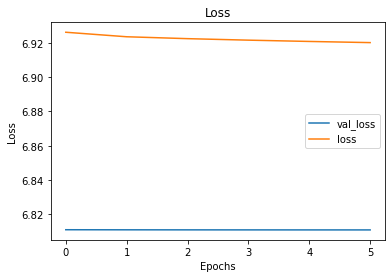

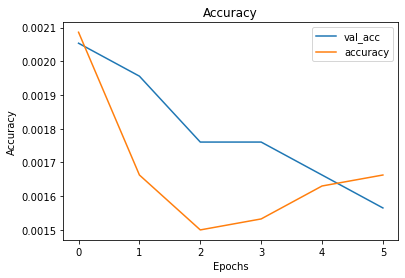

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_in_progress\assets
Starting Time for set 2: 2020-11-01 01:40:52.910679
Data Imported, Time Elapsed: 0:01:02.409374
Data Processed, Time Elapsed: 0:01:13.378343
  ...
    to  
  ['...']
  ...
    to  
  ['...']

Time training:  1:40:06.419166
30675/30675 [==============================] - 350s 11ms/sample - loss: 6.9085 - accuracy: 0.0018
----------
Training Loss: 6.91 
Training Accuracy: 0.00183
10225/10225 [==============================] - 116s 11ms/sample - loss: 6.9102 - accuracy: 0.0014
----------
Validation Loss: 6.91 
Validation Accuracy: 0.00137


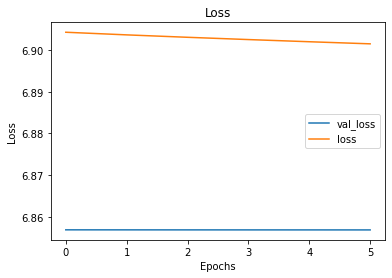

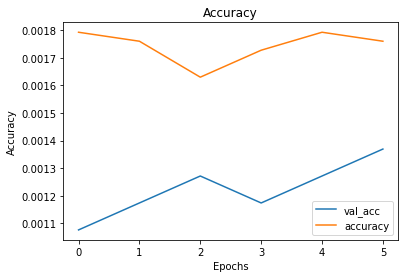

INFO:tensorflow:Assets written to: model_in_progress\assets
Starting Time for set 3: 2020-11-01 03:33:00.691223
Data Imported, Time Elapsed: 0:00:52.142314
Data Processed, Time Elapsed: 0:00:42.831863
  ...
    to  
  ['...']
  ...
    to  
  ['...']

Time training:  2:42:34.161315
30675/30675 [==============================] - 354s 12ms/sample - loss: 6.9074 - accuracy: 0.0016
----------
Training Loss: 6.91 
Training Accuracy: 0.00163
10225/10225 [==============================] - 116s 11ms/sample - loss: 6.9086 - accuracy: 0.0020
----------
Validation Loss: 6.91 
Validation Accuracy: 0.00196


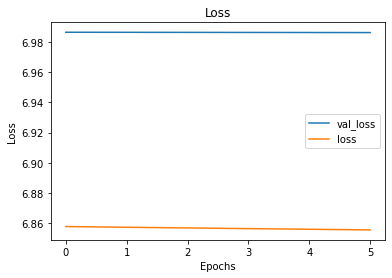

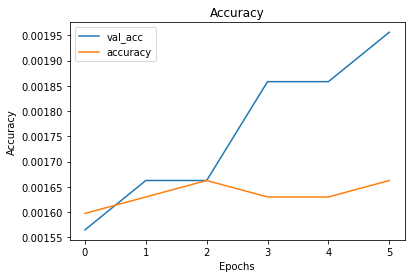

INFO:tensorflow:Assets written to: model_in_progress\assets


In [6]:
# Now put it all together

for x in range(1,4):
    dt_1 = datetime.now()
    print(f'Starting Time for set {x}: {dt_1}')
    
    df = import_data(x)
    dt_2 = datetime.now()
    print('Data Imported, Time Elapsed:',dt_2-dt_1)
    
    X_t,y_t,X_v,y_v = process_data(df,lb)
    dt_3 = datetime.now()
    print('Data Processed, Time Elapsed:',dt_3-dt_2)
    
    gru = model_fit(gru,X_t,y_t,X_v,y_v,False)
    gru.save('model_in_progress')